## **Softmax Regression**

* Softmax regression is a **classification** method ,which **generalizes Logistic Regression**. 

* It is used for **multi-clss clssification**.

Working of softmax regression is depicted in the folllowing figure : 
* For $k$ class labels, the input feature vector goes through $k$ **different linear combinations** ,one per each class label.

* These $k$ values are passed through the **softmax activation**, which returns a **probability vector** containing $k$ components.
    * The $i-th$ component directly denotes **probability** of an input feature belonging to class label $i$.

The softmax classifier is trained with a **categorical cross- entropy** loss, which is computed based on the actual labels and predicted labels.

Note that the labels are represented with **one-hot encoding**.

<!-- ![alt text](Images/softmax-working.png) -->

![](https://sebastianraschka.com/images/faq/softmax_regression/logistic_regression_schematic.png)

We will list down five components of the softmax regression classifier :

* Training Data 

* Model 

* Loss Function 

* Optimization procedure 

* Model Evaluation 

In [36]:
import numpy as np 
from keras.datasets import mnist 
import matplotlib.pyplot as plt
import seaborn as sns

### **Training Data** 
The training data contains : 
* Feature matrix 

* Label (one of $k$ labels)

For the purpose of illustration, we will use **MNIST hand-written digit** dataset.

* Each input is in the form of a 28x28 image of a single-handwritten digit.

* Each image is labeled with digit present in it. 

There are 10 digits in all and hence 10 total classes : [0,1,2 .... ,9]

In [2]:
(X_train ,y_train) ,(X_test ,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape ,y_train.shape)
print(X_test.shape ,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


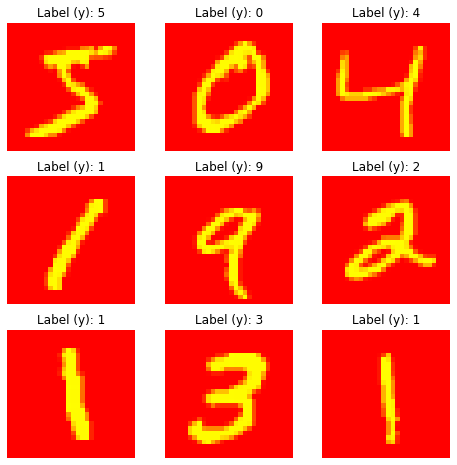

In [8]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i] ,cmap='autumn')
    plt.title('Label (y): {}'.format(y_train[i]))
    plt.axis('off')

plt.show()

Each image is 28 $\times$ 28 pixel.

We flatten each input image into a vector of length 794 (28x28) and these 784 numbers represent the intensity at each pixel in a image.

In [9]:
X_train = X_train.reshape(X_train.shape[0] ,28*28)
X_test = X_test.reshape(X_test.shape[0] ,28*28)

print(X_train.shape ,X_test.shape)

(60000, 784) (10000, 784)


Each pixel values between 0 to 255. We scale each value by dividing by 255.

In [10]:
X_train = X_train/255 
X_test = X_test/255

**Important Step :**

For softmax regression, label-vector $y$ need to be represented in **one-hot encoding**.

In [11]:
def one_hot_encoding(y, k):
    # zero matrix of size (y, k)
    y_one_hot = np.zeros((len(y), k))

    # put 1 for column where the label is y
    y_one_hot[np.arange(len(y)), y] = 1
    return y_one_hot

In [20]:
y = [1,0,1,2,0,3,1,0,3]
np.eye((len(y)))[y]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [24]:
y = ['b', 'a', 'c', 'b', 'a', 'a']
y_unique = list(set(y))
y_sort = sorted(y_unique)

for i in range(len(y)):
    y[i] = y_sort.index(y[i])
y_sort, y

(['a', 'b', 'c'], [1, 0, 2, 1, 0, 0])

In [25]:
one_hot_encoding(y, 3)

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### **Model**

<!-- ![alt text](Images/model.png) -->

![alt text](https://miro.medium.com/max/875/1*xbKo-8awaX5jpuMdPfBLyQ.png)



The **Softmax Regression** has two steps : 

1. **Linear Combination** (in vectorized form) : 
\begin{equation} 
\textbf Z_{n\times k} =\textbf X_{n \times m} \textbf W_{m\times k} + \textbf b_{k \times 1}
\end{equation}


2. **Softmax** non-linear transformation (in vectorized form) :

\begin{equation} 
softmax \textbf (Z) = \frac{exp \textbf (Z)}{\sum exp(Z)}
\end{equation}

Softmax classifier provides a **probablity** of an example belonging to a class : 

\begin{equation}
p(y = q | x;W ,b) = \frac{exp \textbf (z_q)}{\sum_k exp(z_k)}
\end{equation}

### **Softmax Regression Implementation**

**STEP 1 :** In vectorized form, we implement : $Z = Xw +b$

Each class has $m+1$ parameters, one bias and $m$ weights corresponding to $m$ features.

In [26]:
def linear_combination(X, w, b):
    return X@w + b

**STEP 2 :** Calculate the softmax for each class using the above formula.

* The sum of the softmax across all the classes for a given sample is 1.

* The class label with the highest value of softmax is assigned to the sample.

**NOTE :** Every class has a different set of weighs and bias.

In [27]:
def softmax(z):
    # subtract the max of z 
    exp = np.exp(z-np.max(z))

    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
    return exp

### **Loss function : Categorical Cross-Entropy Loss**

For sotmax regression, we use cross-entropy (CE) loss.

For any pair of label vectors $y_k$ and model predictions $ŷ_k$ over $k$ classes, the loss function $J$ is given as : 

\begin{equation} 
\textbf Z (W,b) = - \sum_k y_k log(ŷ_k)
\end{equation}


### **Optimization**
The objective here is to estimate the weight matrix $W_{m \times k}$ and $b$ by optimizing the loss $J(W,b)$.

There are : 
* $m$ X $k$ entries in the weight matrix $W$

* $k$ entries in bias vector $b$.

We calculate the partial derivative of the loss function w.r.t each weight $W[j,i]$ and bias unit $b[i]$.

* $W[j,i]$ represents weight for j-th feature in the i-th linear combination : 
\begin{equation} 
\frac {\partial J(\mathbf W ,b)}{\partial \mathbf W[j,i]}
\end{equation}

* $b[i]$ represents bias for the i-th linear combination : 
\begin{equation} 
\frac {\partial J(\mathbf W ,b)}{\partial \mathbf b[i]}
\end{equation}


**Note that** : Softmax is a **two stage process** : 

1. **Linear Combination** : $z$ = $XW$ + $b$

2. **Non-linear Transformation** : softmax ($XW$ + $b$)

The weights $W[j,i]$ and $b[i]$ are used for calculating $z[i]$ : 

\begin{align}
z[i] = b[i] + x[1]*W[1,i]+ x[2]*W[2,i] + .... + x[m]*W[m,i]
\end{align}

\begin{align}
= b[i] + \sum_{j=1}^{m} x[j] * W[j,i]
\end{align}


And $z[i]$ is used for softmax calculation in numerator for i-th class and in denominators of all classes.

\begin{align}
softmax(z[i]) = \frac{exp \textbf (z[i])}{\sum_k exp(z[i,k])}
\end{align}

The loss is computed based on the output of the softmax. 

Hence the loss and weights are not directly related, but are related through $z$.

We need to make use of chain rule of derivatives to calculate derivatives.

\begin{equation} 
\frac {\partial J(\mathbf W ,b)}{\partial \mathbf W[j,i]} = \frac {\partial J(\mathbf W ,b)}{\partial \mathbf z [i]} * \frac {\partial \mathbf z [i]}{\partial \mathbf W[j,i]}
\end{equation}

\begin{equation} 
\frac {\partial J(\mathbf W ,b)}{\partial \mathbf b[i]} = \frac {\partial J(\mathbf W ,b)}{\partial \mathbf z [i]} * \frac {\partial \mathbf z [i]}{\partial \mathbf b[i]}
\end{equation}

We need to compute three deivatives from eqs (10) and (11) : 

1.  \begin{equation}
    \frac {\partial J(\mathbf W ,b)}{\partial \mathbf z [i]}
    \end{equation}

2.  \begin{equation}
    \frac {\partial \mathbf z [i]}{\partial \mathbf b [i]}
    \end{equation}

3.  \begin{equation}
    \frac {\partial \mathbf z [i]}{\partial \mathbf W[j,i]}
    \end{equation}

Lets calculate them one-by-one : 

\begin{align}
\frac {\partial \mathbf z [i]}{\partial \mathbf W[j,i]} = \frac {\partial}{\partial \mathbf W[j,i]}(b[i] + \sum_{j=1}^{m} x[j] * W[j,i]) = x[j]
\end{align}

\begin{align}
\frac {\partial \mathbf z [i]}{\partial \mathbf b[i]} = \frac {\partial}{\partial \mathbf b[i]}(b[i] + \sum_{j=1}^{m} x[j] * W[j,i]) = 1
\end{align}

While calculating : 

\begin{equation}
\frac {\partial J(\mathbf W ,b)}{\partial \mathbf z [i]}
\end{equation}

**Note that** : 
* $z$ is related to loss through the prediction ŷ. Using chain rule one more time for this. 

* Moreover $z[i]$ is used in calculation of $ŷ[i]$ and $ŷ[j]$, where i≠j. Hence making use of addition.


\begin{align}
\frac {\partial J(\mathbf W ,b)}{\partial \mathbf z [i]} = \frac {\partial J(\mathbf W ,b)}{\partial \mathbf ŷ[i]}\times \frac {\partial \mathbf ŷ[i]}{\partial \mathbf z[i]} + \sum_{j≠1}\frac {\partial J(\mathbf W ,b)}{\partial \mathbf ŷ[j]}\times \frac {\partial \mathbf ŷ[j]}{\partial \mathbf z[i]}
\end{align}



Now lets calculate : 

\begin{align}
\frac {\partial J(\mathbf W ,b)}{\partial \mathbf ŷ[i]} = 
\frac {\partial}{\partial \mathbf ŷ[i]}(- \sum_k y[k] \log ŷ[k]) = - \frac {y[i]}{ ŷ[i]}
\end{align}

Hence, 
\begin{align}
\frac {\partial J(\mathbf W ,b)}{\partial \mathbf ŷ[j]} = - \frac {y[j]}{ ŷ[j]}
\end{align}




Now calculate : 

\begin{align}
\frac {\partial \mathbf ŷ[i]}{\partial \mathbf z[i]} = \frac {\partial }{\partial \mathbf z[i]} \times \frac {e^{z[i]}}{\sum_k e^{z[k]}}
\end{align}

Using quotient rule of derivative : 

\begin{align}
\frac{d}{{dx}}\left( {\frac{{f\left( x \right)}}{{g\left( x \right)}}} \right) = \frac{{\frac{d}{{dx}}f\left( x \right)g\left( x \right) - f\left( x \right)\frac{d}{{dx}}g\left( x \right)}}{{g^2 \left( x \right)}}
\end{align}



\begin{align}
 = \frac{\sum_k e^{z[k]} \frac{\partial}{\partial \mathbf z[i]}e^{z[i]} - e^{z[i]} \frac{\partial}{\partial \mathbf z[i]} \sum_k e^{z[k]}}{(\sum_k e^{z[k]})^2}
\end{align}

\begin{align}
= \frac{e^{z[i]} \sum_k e^{z[k]} - e^{z[i]} . e^{z[i]}}{(\sum_k e^{z[k]})^2}
\end{align}

Simplifying with algebraic multiplication : 
\begin{align}
= \frac{e^{z[i]}}{\sum_k e^{z[k]}} - (\frac{e^{z[i]}}{\sum_k e^{z[k]}})^2
\end{align}

\begin{align}
= ŷ[i] - ŷ[i]^2
\end{align}

Now calculate:

\begin{align}
\frac {\partial \mathbf ŷ[j]}{\partial \mathbf z[i]} = \frac {\partial}{\partial \mathbf z[i]} \times \frac {e ^ {z[j]}}{\sum_k e ^ {z[k]}}
\end{align}

Using quotient rule of derivative:

\begin{align}
\frac{d}{{dx}}\left({\frac{{f\left(x \right)}}{{g\left(x \right)}}} \right) = \frac{{\frac{d}{{dx}}f\left(x \right)g\left(x \right) - f\left(x \right)\frac{d}{{dx}}g\left(x \right)}}{{g ^ 2 \left(x \right)}}
\end{align}


\begin{align}
= \frac{\sum_k e ^ {z[k]} \frac{\partial}{\partial \mathbf z[i]}e ^ {z[j]} - e ^ {z[j]} \frac{\partial}{\partial \mathbf z[i]} \sum_k e ^ {z[k]}}{(\sum_k e ^ {z[k]}) ^ 2}
\end{align}

\begin{align}
= \frac{\sum_k e ^ {z[k]} \textcolor{blue}0 - e ^ {z[j]} \textcolor{blue}{e^{z[i]}} }{(\sum_k e ^ {z[k]}) ^ 2}
\end{align}

\begin{align}
= \frac{ - e ^ {z[j]} \textcolor{blue}{e^{z[i]}} }{(\sum_k e ^ {z[k]}) ^ 2}
\end{align}

Simplifying with algebraic multiplication :

\begin{align}
= - \frac{ e^{z[j]}}{\sum_k e^{z[k]}} \times \frac{e^{z[i]}}{\sum_k e^{z[k]}}
\end{align}


\begin{align} 
= - ŷ[j]\times ŷ[i]
\end{align}


Now we will replace these two parial derivatives in the equation :

\begin{align}
\frac {\partial J(\mathbf W ,b)}{\partial \mathbf z [i]} = \frac {\partial J(\mathbf W ,b)}{\partial \mathbf ŷ[i]}\times \frac {\partial \mathbf ŷ[i]}{\partial \mathbf z[i]} + \sum_{j≠1}\frac {\partial J(\mathbf W ,b)}{\partial \mathbf ŷ[j]}\times \frac {\partial \mathbf ŷ[j]}{\partial \mathbf z[i]}
\end{align}

\begin{align}
= - \frac { \mathbf y[i]}{ \mathbf ŷ[i]}\times  \mathbf ŷ[i]\mathbf (1 -ŷ[i] ) + \sum_{j≠1} - \frac {\mathbf y[j]}{\mathbf ŷ[j]} \times (\mathbf - ŷ[j] \mathbf ŷ[i])
\end{align}

\begin{align}
= - \mathbf y[i] +  \mathbf y[i] \mathbf ŷ[i] + \sum_{j≠1} \mathbf  y[j] \mathbf ŷ[i]
\end{align}

\begin{align}
= - \mathbf y[i]  + \sum_{j} \mathbf  y[j] \mathbf ŷ[i]
\end{align}

\begin{align}
= \mathbf ŷ[i]  \sum_{j} \mathbf  y[j]  - \mathbf y[i]
\end{align}

\begin{align}
= ŷ[i] - y[i]
\end{align}

Substituting equations, we get : 
\begin{align}
\frac {\partial J(\mathbf W ,b)}{\partial W [j,i]} = x[j] (ŷ[i] - y[i])
\end{align}

##### **Partial derivatives in vectorized form**

So, the partial derivative of the loss function are : 

\begin{align}
\frac {\partial J(\mathbf W ,b)}{\partial W} = \mathbf X^T (\mathbf Ŷ - \mathbf Y)
\end{align}

\begin{align}
\frac {\partial J(\mathbf W ,b)}{\partial b} = \mathbf Ŷ - \mathbf Y
\end{align}

##### **Weight Update Rule**

Hence, the update rules for weight parameters are following : 
\begin{align}
\mathbf W_{t+1} \impliedby \mathbf W{t} + \alpha \frac{\partial J (W,b)}{\partial \mathbf W}
\end{align}

\begin{align}
\mathbf b_{t+1} \impliedby \mathbf b{t} + \alpha \frac{\partial J (W,b)}{\partial \mathbf b}
\end{align}

### **Training & Prediction Functions**

1. Initialize the parameters : $w$ & $b$.

2. Find optimal $w$ & $b$ using `gradient descent`.

3. Use `softmax` ($wX$ + $b$ ) to predict.

In [33]:
# X --> Input 
# y --> Target 
# lr --> learning rate 
# c --> no. of classes in classification problem
# epochs --> no. of iterations

def fit(X, y, lr, c, epochs):  
    n, m = X.shape
    
    # initializing weights and bias randomly
    w = np.random.random((m, c))
    b = np.random.random(c)

    losses = []

    for epoch in range(epochs):
        z = X@w + b

        # Calculating hypothesis/prediction
        y_hat = softmax(z)

        # convert to one hot encoding
        y_hot = one_hot_encoding(y, c)

        #Calculating the gradient of loss w.r.t w and b
        w_grad = (1/n)*np.dot(X.T, (y_hat - y_hot))
        b_grad = (1/n)*np.sum(y_hat - y_hot)

        #Updating the parameters

        w = w - lr*w_grad
        b = b - lr*b_grad

        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))

        losses.append(loss)

        #Printing out the loss at every 100th iteration.

        if epoch % 10 == 0:
            print('Epoch {epoch} --> Loss = {loss}'.format(epoch=epoch, loss=loss))

    return w, b, losses

In [34]:
def predict(X,w,b):
    z = X@w + b 
    y_hat = softmax(z)
    return np.argmax(y_hat, axis=1) 

def accuracy(y,y_hat):
    return np.sum(y==y_hat)/len(y)

#### **Training digit recognizer on MNIST dataset**



In [35]:
w, b, loss = fit(X_train, y_train, lr=0.9, c=10, epochs=100)

Epoch 0 --> Loss = 5.194283418827233
Epoch 10 --> Loss = 0.9795913404336352
Epoch 20 --> Loss = 0.6768563838212707
Epoch 30 --> Loss = 0.5721732315425838
Epoch 40 --> Loss = 0.5223727124663429
Epoch 50 --> Loss = 0.48948442661834174
Epoch 60 --> Loss = 0.4657019536979143
Epoch 70 --> Loss = 0.447478316724216
Epoch 80 --> Loss = 0.4329390878691036
Epoch 90 --> Loss = 0.4209899163026792


#### **Learning Curve**

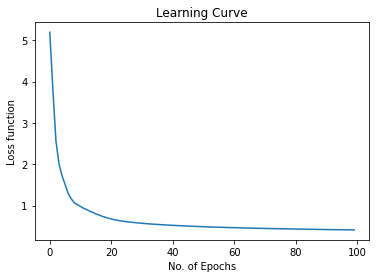

In [37]:
plt.figure()
plt.plot(np.arange(len(loss)), loss)

plt.title('Learning Curve')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss function')
plt.show()

### **Model Evaluation**

In [38]:
# accuracy over train set

train_pred = predict(X_train, w, b)
print(f'Accuracy over training set : {accuracy(y_train, train_pred)}')

# accuracy on test set
test_pred = predict(X_test, w, b)
print(f'Accuracy over test set : {accuracy(y_test, test_pred)}')

Accuracy over training set : 0.8793666666666666
Accuracy over test set : 0.8855


##### **1. Confusion Matrix**

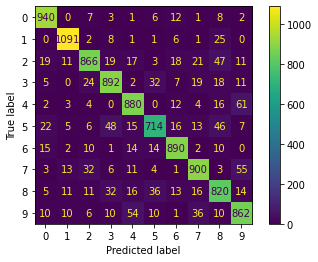

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion = ConfusionMatrixDisplay.from_predictions(y_test, test_pred)
confusion

##### **2. Classification Report**

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.95      0.96      0.96      1135
           2       0.89      0.84      0.87      1032
           3       0.88      0.88      0.88      1010
           4       0.87      0.90      0.88       982
           5       0.87      0.80      0.83       892
           6       0.91      0.93      0.92       958
           7       0.89      0.88      0.88      1028
           8       0.82      0.84      0.83       974
           9       0.84      0.85      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000



##### **3. Precision, Recall & F1 score**

In [43]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('F1 score (micro) : ', f1_score(y_test, test_pred, average='micro'))
print('Precision (micro) : ', precision_score(y_test, test_pred, average='micro'))
print('Recall (micro) : ', recall_score(y_test, test_pred, average='micro'))

F1 score (micro) :  0.8855
Precision (micro) :  0.8855
Recall (micro) :  0.8855


In [44]:
print('F1 score (macro): ', f1_score(y_test, test_pred, average='macro'))
print('Precision (macro): ', precision_score(y_test, test_pred, average='macro'))

print('Recall (macro): ', recall_score(y_test, test_pred, average='macro'))

F1 score (macro):  0.8838839864151241
Precision (macro):  0.8844328628068634
Recall (macro):  0.8840017020741705


### **Prediction visualization**

In [63]:
np.random.randint(15, size=(15))

array([13,  6, 11,  5, 13,  9, 12, 13,  0,  4,  7,  6,  3, 14,  0])

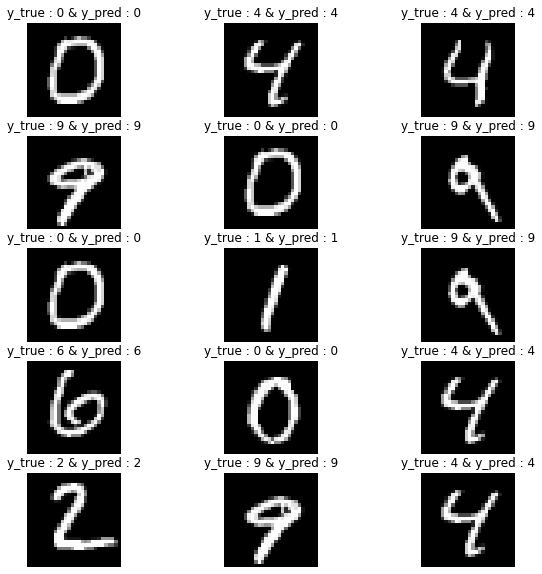

In [66]:
fig = plt.figure(figsize=(10,10))
j = 0
for i in np.random.randint(15, size=(15)):
    ax = fig.add_subplot(5, 3, j+1)
    ax.imshow(X_test[i].reshape(28,28) ,cmap=plt.get_cmap('gray'))
    ax.set_title(f'y_true : {y_test[i]} & y_pred : {test_pred[i]}')
    plt.axis('off')
    j += 1
plt.show()
